<a href="https://colab.research.google.com/github/YoonSungLee/University-Lectures/blob/master/Statistical-Computing/comStat4(TimeSeries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'><div style="text-align: center">Ch A. Time Series in Python </font>
    
* 시계열은 시간 순서에 따라 관측된 자료값을 등간격의 시간 순서(매일 아침, 1시간에 1번 등)로 나열한 자료를 의미함
* 이렇게 등간격의 시간 순서로 관측된 자료를 이산형 시계열(discrete time series)라고 한다. ex) 소리
* 예를 들어, 파도의 높이, 태양흑점의 수, 매일관측되는 다우지수값 등이 시계열이다. 
* IID sampling(Identically Independently Distributed sampling) : 데이터간에 순서가 의미가 없는 샘플링(xi : i번째 사람의 키)
* 시계열 데이터 : 데이터들간에 dependent, 순서가 중요
* 예시 : 번역시스템, 글자 자동완성기능

* 정상성(Stationarity): 시계열의 평균과 분산이 시간에 따라 일정하게 나타나는 성질을 정상성이라고 한다.
* Weakly Stationarity: 실제 데이터에서 시간에 따라 평균과 분산이 변하지 않는 것은 불가능하므로 약간의 변화가 있더라도 크게 봤을 때, 일정한 경향이 있다면  약 정상성을 가진다고 한다.

* 비정상성(Non-Stationarity): 시간에 따라 시계열이 증가 혹은 감소할 수도 있고, 주기를 가질 수도 있다. 이렇게 시간에 따라 평균이나 분산이 의미있게 변화하는 것을 비정상성이라고 한다.(평균이 변화 : 점점 증가하거나 감소하는 경향/ 분산이 변화 : 평균은 일정하지만, 즉 하나의 축을 중심으로 이동하지만 폭이 점점 증가하거나 감소하는 경향)
  * Trend: 시간에 따라 전반적으로 증가하거나 감소하는 경향
  * Seasonality: 특정 주기를 기준으로 오르락 내리락 하는 경향으로 월별 아이스크림 판매량 등이 예다.




### <font color='blue'> Pandas Time Series Data Structure </font>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Get Google Trends data of keywords such as ‘diet’ and ‘gym’ and see how they vary over time 
df = pd.read_csv("/gdrive/My Drive/전산통계/data/multiTimeline.csv")
print(df.head())

     month  diet  gym  finance
0  2004-01   100   31       48
1  2004-02    75   26       49
2  2004-03    67   24       47
3  2004-04    70   22       48
4  2004-05    72   22       43


In [0]:
# df.month는 문자이므로 연산 불가능

a = df.month.tolist()
a[0:5]


['2004-01', '2004-02', '2004-03', '2004-04', '2004-05']

In [0]:
# df.month를 날짜로 바꿈

df.month = pd.to_datetime(df.month)
print(df.head())
df.set_index('month', inplace=True)

       month  diet  gym  finance
0 2004-01-01   100   31       48
1 2004-02-01    75   26       49
2 2004-03-01    67   24       47
3 2004-04-01    70   22       48
4 2004-05-01    72   22       43


Text(0.5, 0, 'Year')

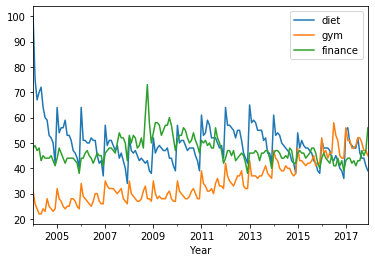

In [0]:
df.plot()
plt.xlabel('Year')

In [0]:
diet = df['diet']
diet_resamp_yr = diet.resample('A').mean() # resample('A').mean() : 12개월 평균값 도출(A:1년, Q:분기)
diet_roll_yr = diet.rolling(12).mean() # 12개월 이동평균 도출

In [0]:
diet_resamp_yr

month
2004-12-31    63.666667
2005-12-31    51.916667
2006-12-31    48.916667
2007-12-31    46.666667
2008-12-31    44.083333
2009-12-31    46.083333
2010-12-31    48.000000
2011-12-31    52.583333
2012-12-31    52.833333
2013-12-31    53.500000
2014-12-31    48.666667
2015-12-31    46.083333
2016-12-31    44.333333
2017-12-31    47.666667
Freq: A-DEC, Name: diet, dtype: float64

In [0]:
print(df['diet'][0:12].mean())
print(df['diet'][12:24].mean())

63.666666666666664
51.916666666666664


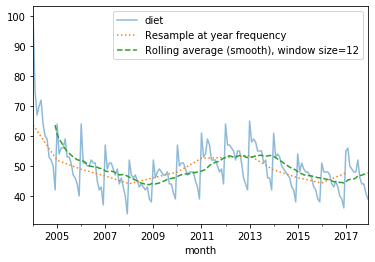

In [0]:
ax = diet.plot(alpha=0.5, style='-') # store axis (ax) for latter plots
diet_resamp_yr.plot(style=':', label='Resample at year frequency', ax=ax)
diet_roll_yr.plot(style='--', label='Rolling average (smooth), window size=12', ax=ax)
ax.legend()

Question) 평균이나 이동평균은 주기를 제거하고 경향성만 남긴다고 할 수 있는가?<br>
12개월간의 평균을 모두 계산해서 그래프를 그려보면 주기를 제거한 그래프임을 확인할 수 있다.

Text(0.5, 0, 'Year')

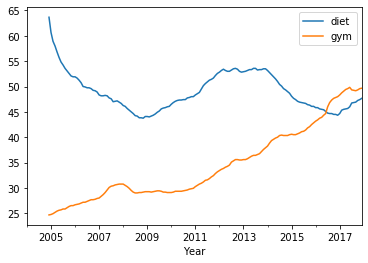

In [0]:
gym = df['gym']
df_avg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_avg.plot()
plt.xlabel('Year')

In [0]:
# 상관계수는 iid sample에 한해서만 적용한다. 시계열 데이터는 각각의 데이터가 독립적이지 않으므로 상관계수를 적용하지 않는다.
# 예시 : 라디오 보급의 수와 정신병자의 수는 모두 증가 -> 양의 상관계수 -> 라디오 보급이 증가하면 정신병자의 수가 증가한다?

df_avg.corr()

,diet,gym
diet,1.000000,-0.298725
gym,-0.298725,1.000000


Text(0.5, 0, 'Year')

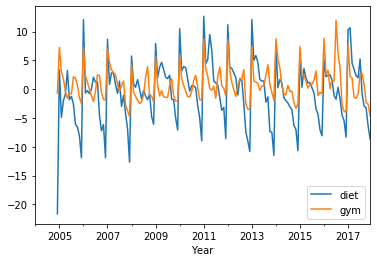

In [0]:
# de-trending (trend 영향 제거)
# df_avg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_dtrend = df[["diet", "gym"]] - df_avg
df_dtrend.plot()
plt.xlabel('Year')

* 차분(Differencing) : 차분은 비정상 시계열을 정상시계열로 바꾸기 위한 변수변환이다.<br>
$ \Delta Y_t = Y_t - Y_{t-1} $ <br>
$ \Delta^2 Y_t = \Delta Y_t - \Delta Y_{t-1} $

Text(0.5, 0, 'Year')

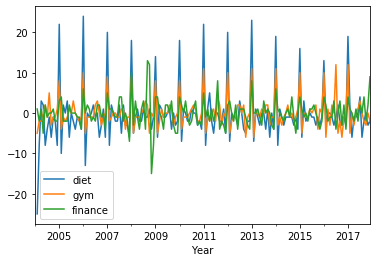

In [0]:
# 1차 차분
# Trend 제거
# 계절성 경향은 존재

df.diff().plot()
plt.xlabel('Year')

Text(0.5, 0, 'Year')

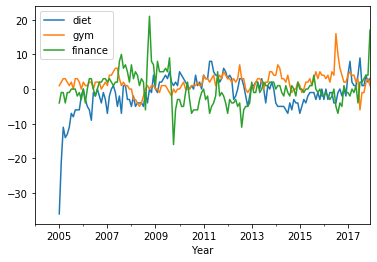

In [0]:
# 12차 차분을 통해 계절성을 제거함
# Trend는 존재
df.diff(12).plot()
plt.xlabel('Year')

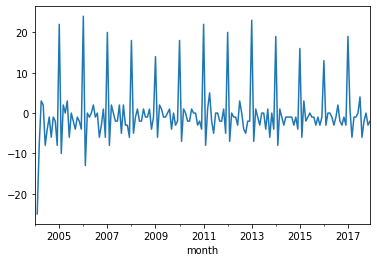

In [0]:
y = df['diet']
y1 = y.diff(1)
y1.plot()
# is stationary?
# 평균과 분산은 일정하지만 주기가 존재하기 때문에(계절성) stationary하지 않다.

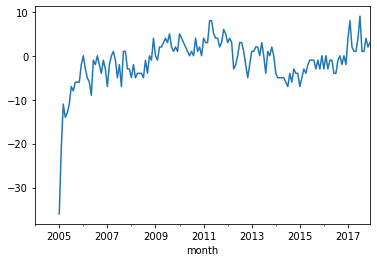

In [0]:
y12 = y.diff(12) # 12개 단위로 차(delta Y(t) = Y(t) - Y(t-12))
y12.plot()
# is stationary?
# No(Trend 존재)

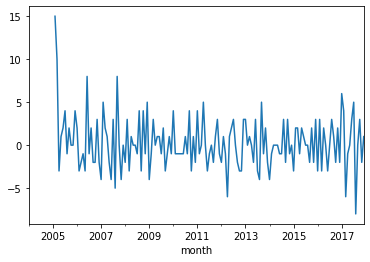

In [0]:
# 1차 차분 후 계절성에 따른 차분(s=12)
# y1 : 경향 제거, 계절성 존재
# y1_12 : 경향 제거, 계절성 제거

y1_12 = y1.diff(12)
y1_12.plot()
# is stationary?

### <font color='blue'> 시계열 성분 분해(Time Series Decomposition) </font>

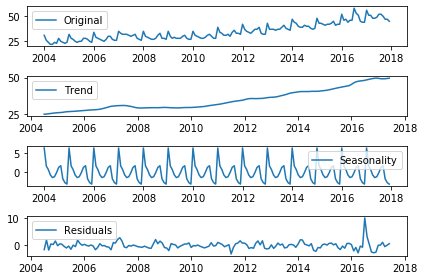

In [0]:
# Additive Model(가법 모델)
# Original - (Trend + Seasonality) = Residuals
# Y(t) = T(t) + S(t) + R(t)
# 1) T_hat(t) = seasonal크기만큼의 이동평균(MA(S))
# Y'(t) = Y(t) - T_hat(t) = S(t) + R(t)
# 2) S_hat(t) : Y'(t), Y'(t+s), Y'(t+2s), ... 의 평균(Y(t) - T_hat(t)에 대한 S주기의 평균)
# Y'(t) - S_hat(t) = R(t)
# R(t) : 이해, 예측

# Residuals를 예측하는 것이 중요하다.
# White Noise : 백색 잡음, 전혀 예측하지 못하는 잡음(Residuals를 더 이상 분해할 수 없을 때까지 분해하면 White Noise가 된다)
# 시계열 성분 분해의 목표 : White Noise를 추출하는 것(White Noise를 추출하게 되면 더 이상 예측할 수 없기 때문)

from statsmodels.tsa.seasonal import seasonal_decompose
y = gym
y = y.astype(float) # force float
decomposition = seasonal_decompose(y)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### ~11.6

### <font color='blue'> Autocorrelation(ACF): 자기상관계수 </font>

$$ \text {Autocorrelation with time lag k} \rightarrow  Cor(Y_t , Y_{t-k}) $$

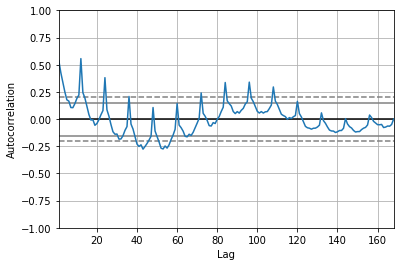

In [0]:
from pandas.plotting import autocorrelation_plot
y = df["diet"].astype(float)
autocorrelation_plot(y)
# ACF peaks every 12 months: Time series is correlated with itself shifted by 12 months
# k가 12의 배수일 때 자기상관계수가 높다. 즉, 주기가 12라는것을 짐작할 수 있다.

### <font color='blue'> ARiMA(Autoregressive integrated moving average) </font>
ARIMA model is transformed into stationary time series through the difference and fitting as ARMA model.

* AR(p) : ARIMA(p,0,0)
* MA(q) : ARIMA(0,0,q)
* ARMA(p,q) : ARIMA(p,0,q)
* iMA(d,q) : ARIMA(0,d,q)<br>

Data가
* Non-Stationary? => ARIMA(p,d,q)
* Stationary? => ARMA(p,q)<br>

$ Y_t \sim ARiMA(p,1,q) \rightarrow \Delta Y_t \sim ARMA(p,q) $

$ \text{AR(1): } Y_t = a_1 Y_{t-1} + \epsilon_t $<br>
$ \text{AR(2): } Y_t = a_1 Y_{t-1} + a_2 Y_{t-2} + \epsilon_t $<br>
$ \text{MA(2): } Y_t = b_1 \epsilon_{t-1} + b_2 \epsilon_{t-2} + \epsilon_t $<br>
$ \text{ARMA(2,1): } Y_t - a_1 Y_{t-1} - a_2 Y_{t-2}  = b_1 \epsilon_{t-1} + \epsilon_t $

ARMA(p,q): <br>
$$ (1- \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p ) (Y_t - \mu ) =  (1 - \theta_1 L - \cdots - \theta_q L^q) \epsilon_t , $$
$ where\  \phi_1 LY_t = \phi_1 Y_{t-1}, \phi_p L^p Y_t = \phi_p Y_{t-p}$ <br>
pi들을 Gradient Descend Algorithm을 통해 구한다

$\text{ARIMA(p,d,q)(P,D,Q)s, where d, D is differencing order} $
$\text{ARIMA(p,d,q)(P,D,Q)s } \rightarrow ARMA(p,q)(P,Q)s $

Seasonal ARMA(p,q)(P,Q)s: <br>
$$ (1- \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p ) (1- \phi'_1 L^s - \phi'_2 L^{2s} - \cdots - \phi'_p L^{ps} )(Y_t - \mu ) =  (1 - \theta_1 L - \cdots - \theta_q L^q)(1 - \theta'_1 L^s - \cdots - \theta'_q L^{sq}) \epsilon_t  $$ <br>

Select the appropriate p, q, P, Q.


![대체 텍스트](https://i.imgur.com/HKmTknE.jpg)
![대체 텍스트](https://i.imgur.com/8C0d35Z.jpg)

### ~11.11

Question) 순서가 1차(s=12) -> 1차?<br>
아마도 가능할 것으로 보인다.

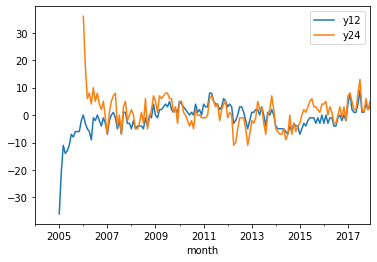

In [0]:
# find that d, D from original time series y
y12 = y.diff(12)
y12.plot(label='y12')
y24 = y12.diff(12)
y24.plot(label='y24')
plt.legend()
# we select D = 12

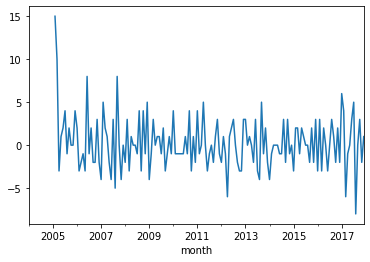

In [0]:
y12_1 = y12.diff(1)
y12_1.plot()
# we select d=1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   diet   No. Observations:                  121
Model:                     ARMA(1, 1)   Log Likelihood                -399.318
Method:                       css-mle   S.D. of innovations              6.523
Date:                Fri, 15 Nov 2019   AIC                            806.635
Time:                        11:50:04   BIC                            817.818
Sample:                    01-01-2004   HQIC                           811.177
                         - 01-01-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3562      6.594      8.394      0.000      42.431      68.281
ar.L1.diet     0.9504      0.051     18.769      0.000       0.851       1.050
ma.L1.diet    -0.4651      0.118     -3.947      0.0

Text(0.5, 1.0, 'RSS: 6604.1881')

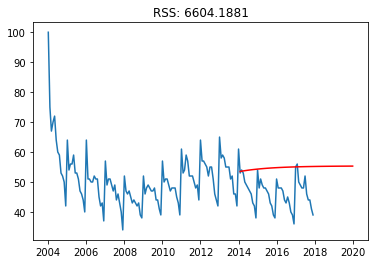

In [0]:
# seasonailty가 존재하기 때문에 예측을 잘 하지 못한다.

from statsmodels.tsa.arima_model import ARMA
from pandas import datetime

y_train = y[:'2014-01-01']
y_test = y['2014-02-01':]

# non seasonal ARIMA model
model = ARMA(y_train, order=(1, 1)).fit() # fit model, ARMA(1,1)인 모델
print(model.summary())
plt.plot(y)
start_index = datetime(2014, 2, 1)
end_index = datetime(2020, 1, 1)
plt.plot(model.predict(start=start_index, end=end_index), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-y_train)**2))

In [0]:
model.predict(start=start_index, end=end_index)

2014-02-01    53.518475
2014-03-01    53.609632
2014-04-01    53.696267
2014-05-01    53.778605
2014-06-01    53.856859
                ...    
2019-09-01    55.295411
2019-10-01    55.298427
2019-11-01    55.301294
2019-12-01    55.304018
2020-01-01    55.306607
Freq: MS, Length: 72, dtype: float64

Text(0.5, 1.0, 'RSS: 6604.1881')

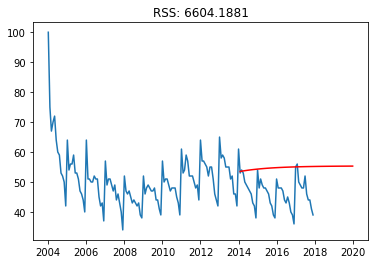

In [0]:
plt.plot(y)
start_index = datetime(2014, 2, 1)
end_index = datetime(2020, 1, 1)
plt.plot(model.predict(start=start_index, end=end_index), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-y_train)**2))

In [0]:
# seasonal ARIMA Model (d=1, D=1, s=12)
# d=1 : 1차 차분
# D=1, s=12 : 1차 차분한 것을 다시 1차차분(간격은 12로 설정)

from statsmodels.tsa.statespace.sarimax import SARIMAX  
model = SARIMAX(y_train, order=(0,1,1), seasonal_order=(0,1,1,12)) # seasonal ARIMA(p,d,q)(P,D,Q)s에서 (p,d,q) = (0,1,1), (P,D,Q,S) = (0,1,1,12)
results = model.fit()
print (results.summary())

# p-value(Prob(Q))가 작기 때문에 이 모델이 의미가 있음을 알 수 있다.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               diet   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -271.740
Date:                            Fri, 15 Nov 2019   AIC                            549.480
Time:                                    11:50:05   BIC                            557.527
Sample:                                01-01-2004   HQIC                           552.743
                                     - 01-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1497      0.058     -2.562      0.010      -0.264      -0.035
ma.S.L12      -0.4466      0.101   

Ljung-Box(Q) :  자기상관계수<br>
Prob(Q) : 자기상관계수의 p-value

The Ljung-Box test is used to check if exists autocorrelation in a time series. 
The statistic is

$$ Q = n(n+2) \sum_{j=1}^h \hat\rho(j)^2/(n-j) $$

p-value = 0.87 > sig. level = 0.05 <br>
-> There is no evidence that autocorrelation exists in error : White noise. <br>
위의 모델에서 Prob(Q)가 0.87임을 통해 p-value가 0.87임을 확인할 수 있다.<br>


Question) p-value(Prob(Q))는 자기상관계수? 그렇다면 적어야 좋은 것? 그 기준은?<br>
p-value가 0.87이므로 Q가 그리 크지 않다는 것을 알 수 있다. 즉 자기상관계수가 그리 크지 않기 때문에 이 데이터는 WhiteNoise라고 할 수 있다.<br>
첫 번째 예시에는 Prob(Q)가 없는 이유? 모델이 의미가 있는지 확인하는 방법?
<br>
초기 파라미터 값을 주거나, SARIMAX 모델의 P=0, D=0 Q=0을 주어서 같은 모델로 만들어서 결과값을 확인하는 방법이 있다.

In [0]:
start_index = datetime(2017, 1, 1)
end_index = datetime(2019, 1, 1)
forecast = results.forecast(48)
forecast

2014-02-01    54.316085
2014-03-01    55.069542
2014-04-01    54.852532
2014-05-01    52.579374
2014-06-01    51.130583
2014-07-01    51.935742
2014-08-01    49.709951
2014-09-01    48.945614
2014-10-01    44.010084
2014-11-01    43.407850
2014-12-01    39.850266
2015-01-01    60.030615
2015-02-01    53.161700
2015-03-01    53.915156
2015-04-01    53.698146
2015-05-01    51.424988
2015-06-01    49.976197
2015-07-01    50.781356
2015-08-01    48.555565
2015-09-01    47.791228
2015-10-01    42.855699
2015-11-01    42.253464
2015-12-01    38.695880
2016-01-01    58.876229
2016-02-01    52.007314
2016-03-01    52.760771
2016-04-01    52.543760
2016-05-01    50.270603
2016-06-01    48.821811
2016-07-01    49.626970
2016-08-01    47.401179
2016-09-01    46.636842
2016-10-01    41.701313
2016-11-01    41.099079
2016-12-01    37.541495
2017-01-01    57.721843
2017-02-01    50.852928
2017-03-01    51.606385
2017-04-01    51.389375
2017-05-01    49.116217
2017-06-01    47.667425
2017-07-01    48

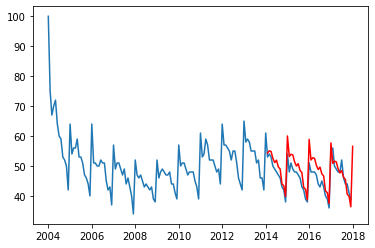

In [0]:
plt.plot(y)
start_index = datetime(2014, 2, 1)
end_index = datetime(2018, 1, 1)
plt.plot(results.forecast(48), color='red')


##### one step ahead prediction

- In sample (prediction): The expected value of the data (in-sample), given the estimates of the parameters.
- Out of sample (forecasting): The value of a future data that is not observed by the sample. <br>
![forecast](https://drive.google.com/uc?id=1EvtrJNEOhqs8KXBiwsedvGOWyXhqmhVK)

- one step ahead forecasting: 
$$ E(Y_{t+1} | Y_1, \cdots , Y_t) $$

##### Model selection(finding appropriate p, q, P, Q)

1. Fits all possible combinations p, q, P, Q(0<= p,q,P,Q <= 2)
2. Calculates the AIC of each models
3. Find the minimum AIC model.

<font color='red'> H.W #9:  Forecast the sales for 1 year from January 1994. </font>
https://robjhyndman.com/tsdldata/data/fancy.dat

monthly souvenir sales amount data(1987.1 ~ 1993.12)


### <font color='blue'> <div style="text-align: center">End of Chapter </font>  

### ~11.13